# Electrodunas

# Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cuenta ouliers
def contar_outliers(df):
    numero_de_outliers ={'Columnas':[], 'Numero Outliers':[]}
    for  column in range(df.shape[1]):
        lista_tipo=['float64', 'int64']
        if (df.iloc[:,column]).dtypes in lista_tipo:
            df_data=df.iloc[:,column]
            q1 = df_data.quantile(q=0.25)
            q2 = df_data.quantile(q=0.5)
            q3 = df_data.quantile(q=0.75)
            iqr = q3 - q1
            upper = q3 + 1.5 * iqr
            lower = q1 - 1.5 * iqr
            #Contar número de outliers
            ubicacion_outliers = (df_data<lower) | (df_data>upper)
            numero_outliers = ubicacion_outliers[ubicacion_outliers==True].sum()
            #print(numero_outliers)
            # Agrego suma de outliers por columna
            numero_de_outliers['Columnas'].append(df.columns[column])
            #numero_de_outliers['Columnas']=pd.concat([numero_de_outliers['Columnas'], df.columns[column]],ignore_index=True )
            numero_de_outliers['Numero Outliers'].append(numero_outliers)
            #numero_de_outliers['Numero Outliers']=pd.concat([numero_de_outliers['Numero Outliers'], numero_outliers],ignore_index=True )

    return pd.DataFrame(numero_de_outliers).sort_values('Numero Outliers', ascending=False)

# Cargamos los datos

In [5]:
archivos= []
rango = range(1, 31, 1)
for i in rango:
  nombre = "DATOSCLIENTE" + str(i) + '.csv'
  archivos.append(nombre)

for i in range(len(archivos)):
    url= 'https://raw.githubusercontent.com/Pacheco-Carvajal/GPA-Data-ElectroDunas/main/' + archivos[i]
    temp = pd.read_csv(url)
    temp['idCliente'] = i + 1
    if i == 0:
      clientes = temp.copy()
    else:
      clientes = pd.concat([clientes, temp])
clientes

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,idCliente
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,1
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,1
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,1
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,1
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,1
...,...,...,...,...,...,...
11410,2022-04-21 10:00:00,0.960105,0.473234,1273.150602,1027.084539,30
11411,2022-04-21 11:00:00,0.624300,0.699936,1063.524968,1205.829819,30
11412,2022-04-21 12:00:00,0.985633,0.123560,1207.284283,1127.893714,30
11413,2022-04-21 13:00:00,0.710436,0.399262,1205.012971,1090.835898,30


# Transformamos los datos

In [6]:
clientes['Fecha'] = pd.to_datetime(clientes['Fecha'])
clientes['Mes'] = clientes['Fecha'].dt.month
clientes['Año'] = clientes['Fecha'].dt.year
clientes['Año_Mes'] = clientes['Fecha'].dt.to_period('M')
clientes = clientes[~(clientes['Año_Mes'] == '2023-04')]
clientes.head()

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,idCliente,Mes,Año,Año_Mes
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,1,1,2021,2021-01
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,1,1,2021,2021-01
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,1,1,2021,2021-01
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,1,1,2021,2021-01
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,1,1,2021,2021-01


# Análisis descriptivo

In [7]:
clientes.describe().astype(int)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'Timestamp'

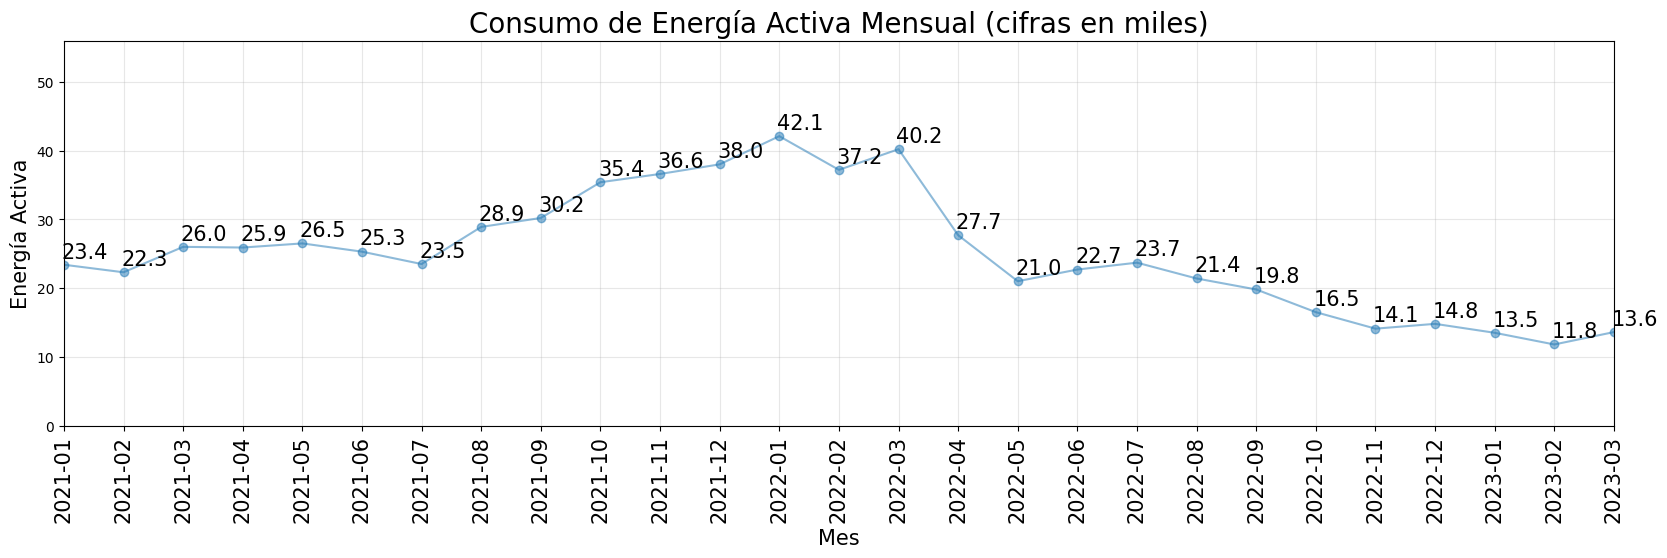

In [ ]:
energia_activa_mes = clientes[['Active_energy', 'Año_Mes']].groupby('Año_Mes').sum().reset_index()
energia_activa_mes['Active_energy'] = round(energia_activa_mes['Active_energy'] / 1e3, 1)

ax = energia_activa_mes.plot(x='Año_Mes', y='Active_energy', legend=False, figsize=(20, 5), marker='o', alpha=0.5)
for i, txt in enumerate(energia_activa_mes['Active_energy']):
    ax.annotate(txt, (energia_activa_mes['Año_Mes'].iloc[i], energia_activa_mes['Active_energy'].iloc[i]), textcoords="offset points", xytext=(15,5), ha='center', fontsize=15)
ax.set_xticks(energia_activa_mes['Año_Mes'])
ax.set_xticklabels(energia_activa_mes['Año_Mes'], fontsize=15, rotation=90)
ax.set_ylim(0, max(energia_activa_mes['Active_energy']) + energia_activa_mes['Active_energy'].quantile(0.1))
plt.title('Consumo de Energía Activa Mensual (cifras en miles)', fontsize=20)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Energía Activa', fontsize=15)
plt.grid(True, alpha=0.3)
plt.show()

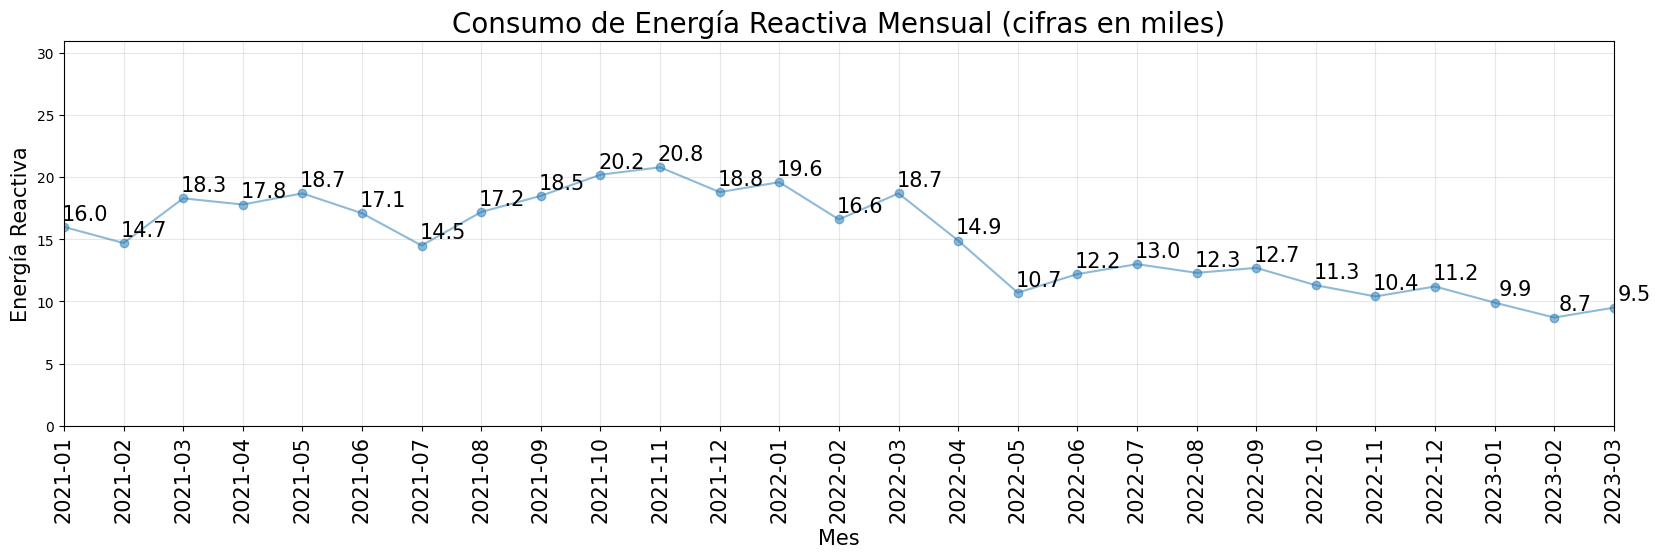

In [ ]:
energia_activa_mes = clientes[['Reactive_energy', 'Año_Mes']].groupby('Año_Mes').sum().reset_index()
energia_activa_mes['Reactive_energy'] = round(energia_activa_mes['Reactive_energy'] / 1e3, 1)

ax = energia_activa_mes.plot(x='Año_Mes', y='Reactive_energy', legend=False, figsize=(20, 5), marker='o', alpha=0.5)
for i, txt in enumerate(energia_activa_mes['Reactive_energy']):
    ax.annotate(txt, (energia_activa_mes['Año_Mes'].iloc[i], energia_activa_mes['Reactive_energy'].iloc[i]), textcoords="offset points", xytext=(15,5), ha='center', fontsize=15)
ax.set_xticks(energia_activa_mes['Año_Mes'])
ax.set_xticklabels(energia_activa_mes['Año_Mes'], fontsize=15, rotation=90)
ax.set_ylim(0, max(energia_activa_mes['Reactive_energy']) + energia_activa_mes['Reactive_energy'].quantile(0.1))
plt.title('Consumo de Energía Reactiva Mensual (cifras en miles)', fontsize=20)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Energía Reactiva', fontsize=15)
plt.grid(True, alpha=0.3)
plt.show()

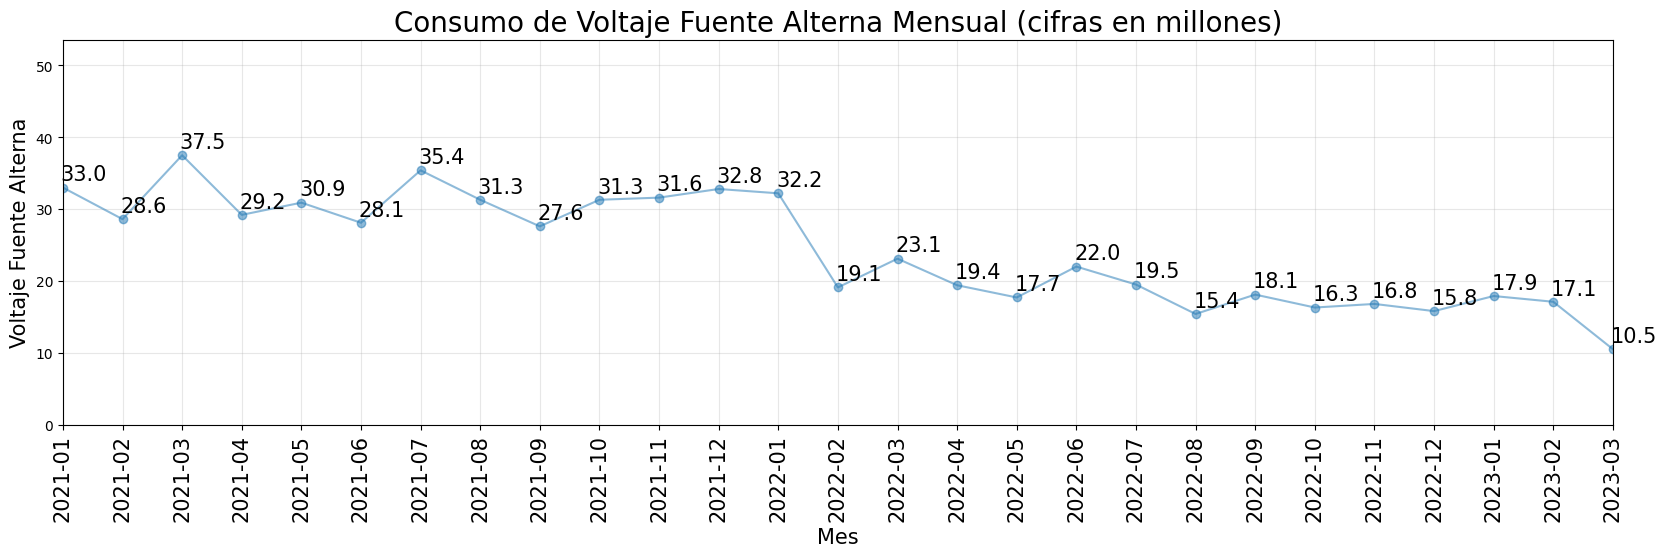

In [ ]:
energia_activa_mes = clientes[['Voltaje_FA', 'Año_Mes']].groupby('Año_Mes').sum().reset_index()
energia_activa_mes['Voltaje_FA'] = round(energia_activa_mes['Voltaje_FA'] / 1e6, 1)

ax = energia_activa_mes.plot(x='Año_Mes', y='Voltaje_FA', legend=False, figsize=(20, 5), marker='o', alpha=0.5)
for i, txt in enumerate(energia_activa_mes['Voltaje_FA']):
    ax.annotate(txt, (energia_activa_mes['Año_Mes'].iloc[i], energia_activa_mes['Voltaje_FA'].iloc[i]), textcoords="offset points", xytext=(15,5), ha='center', fontsize=15)
ax.set_xticks(energia_activa_mes['Año_Mes'])
ax.set_xticklabels(energia_activa_mes['Año_Mes'], fontsize=15, rotation=90)
ax.set_ylim(0, max(energia_activa_mes['Voltaje_FA']) + energia_activa_mes['Voltaje_FA'].quantile(0.1))
plt.title('Consumo de Voltaje Fuente Alterna Mensual (cifras en millones)', fontsize=20)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Voltaje Fuente Alterna', fontsize=15)
plt.grid(True, alpha=0.3)
plt.show()

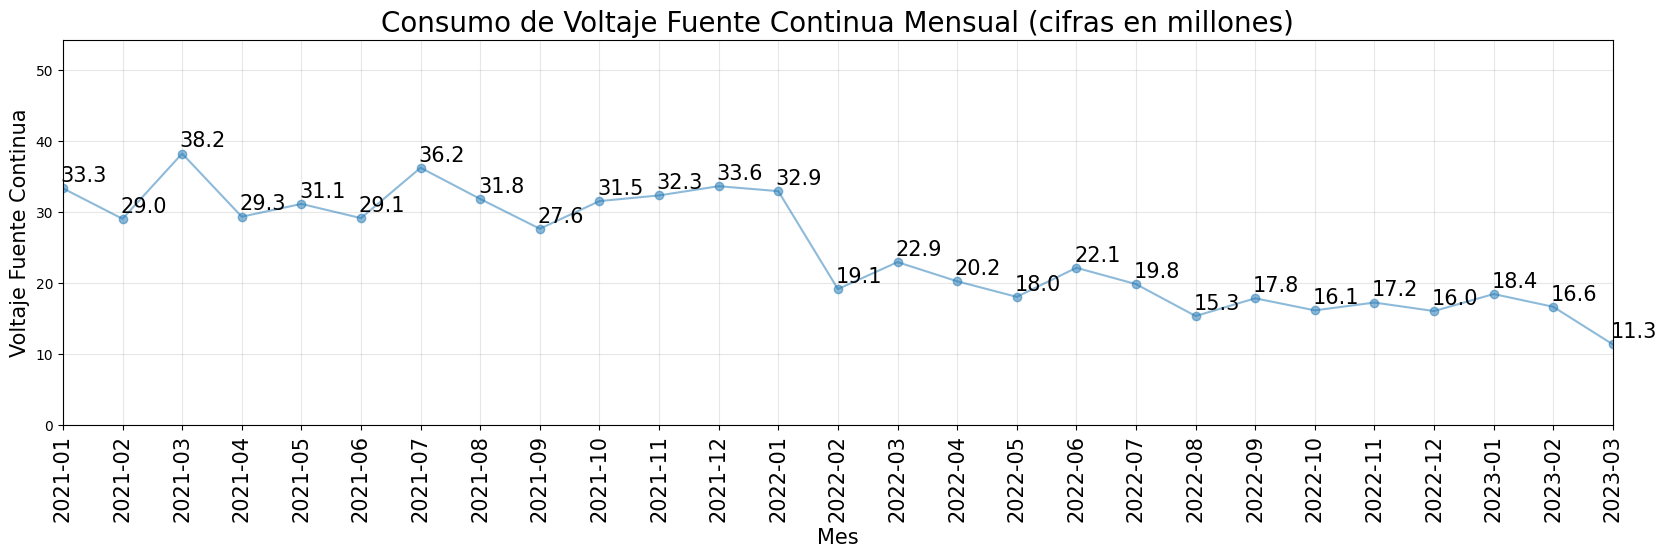

In [ ]:
energia_activa_mes = clientes[['Voltaje_FC', 'Año_Mes']].groupby('Año_Mes').sum().reset_index()
energia_activa_mes['Voltaje_FC'] = round(energia_activa_mes['Voltaje_FC'] / 1e6, 1)

ax = energia_activa_mes.plot(x='Año_Mes', y='Voltaje_FC', legend=False, figsize=(20, 5), marker='o', alpha=0.5)
for i, txt in enumerate(energia_activa_mes['Voltaje_FC']):
    ax.annotate(txt, (energia_activa_mes['Año_Mes'].iloc[i], energia_activa_mes['Voltaje_FC'].iloc[i]), textcoords="offset points", xytext=(15,5), ha='center', fontsize=15)
ax.set_xticks(energia_activa_mes['Año_Mes'])
ax.set_xticklabels(energia_activa_mes['Año_Mes'], fontsize=15, rotation=90)
ax.set_ylim(0, max(energia_activa_mes['Voltaje_FC']) + energia_activa_mes['Voltaje_FC'].quantile(0.1))
plt.title('Consumo de Voltaje Fuente Continua Mensual (cifras en millones)', fontsize=20)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Voltaje Fuente Continua', fontsize=15)
plt.grid(True, alpha=0.3)
plt.show()

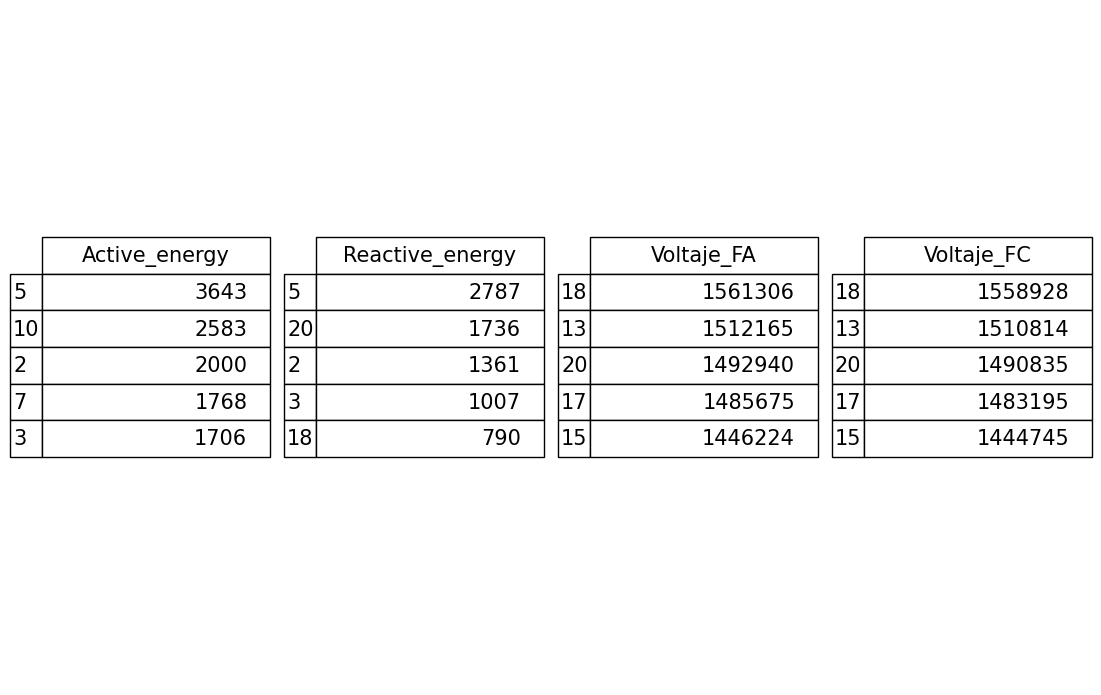

In [ ]:
promedio_clientes = clientes.groupby(['Año_Mes', 'idCliente']).sum().reset_index()
promedio_clientes = promedio_clientes.groupby('idCliente').mean()

top_energia_activa = promedio_clientes.Active_energy.sort_values(ascending=False).iloc[:5].astype(int)
top_energia_reactiva = promedio_clientes.Reactive_energy.sort_values(ascending=False).iloc[:5].astype(int)
top_voltaje_fa = promedio_clientes.Voltaje_FA.sort_values(ascending=False).iloc[:5].astype(int)
top_voltaje_fc = promedio_clientes.Voltaje_FC.sort_values(ascending=False).iloc[:5].astype(int)

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
for i, df in enumerate([pd.DataFrame(top_energia_activa), pd.DataFrame(top_energia_reactiva), pd.DataFrame(top_voltaje_fa), pd.DataFrame(top_voltaje_fc)]):
    axs[i].axis('off')
    tabla = table(axs[i], df, loc='center', colWidths=[1]*len(df.columns))
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(15)
plt.subplots_adjust(left=0.1, right=0.8, top=1.8, hspace=2)
plt.show()

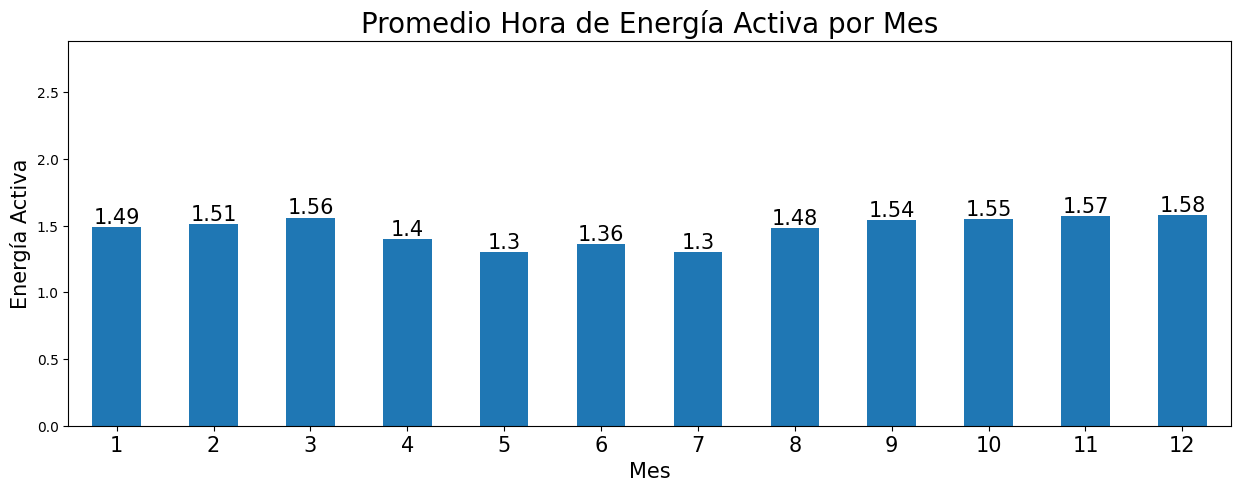

In [ ]:
promedio_mensual = round(clientes.groupby('Mes')['Active_energy'].mean().reset_index(), 2)

ax = promedio_mensual.plot.bar(x='Mes', y='Active_energy', rot=0, legend=False, figsize=(15, 5))
plt.ylabel('Energía Activa', fontsize=15)
plt.xlabel('Mes', fontsize=15)
ax.set_xticklabels(promedio_mensual['Mes'], fontsize=15)
plt.title('Promedio Hora de Energía Activa por Mes', fontsize=20)
for container in ax.containers:
    ax.bar_label(container, fontsize=15)
ax.set_ylim(0, max(promedio_mensual['Active_energy']) + promedio_mensual['Active_energy'].quantile(0.1))
plt.show()

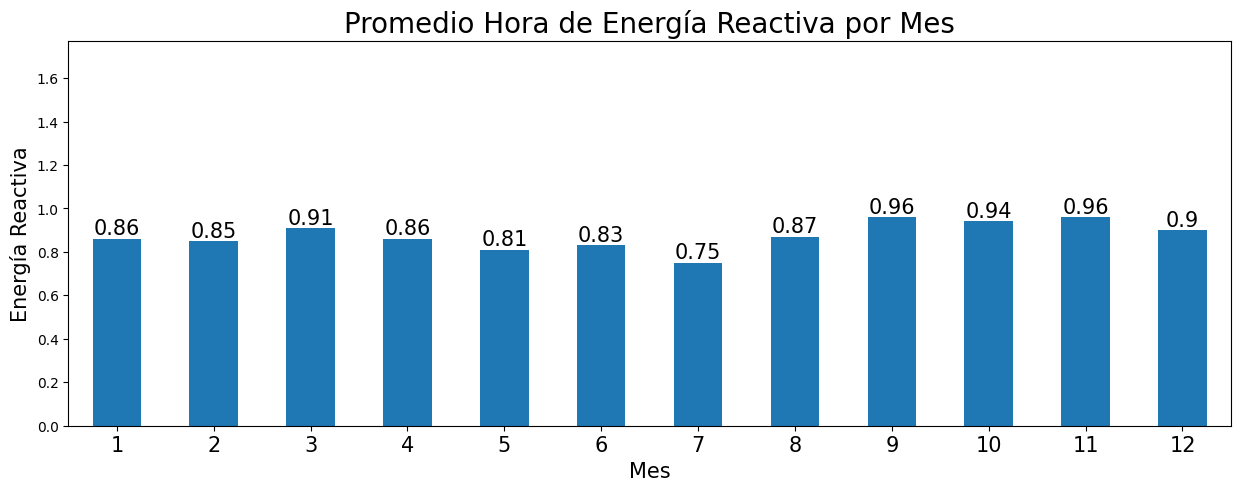

In [ ]:
promedio_mensual = round(clientes.groupby('Mes')['Reactive_energy'].mean().reset_index(), 2)

ax = promedio_mensual.plot.bar(x='Mes', y='Reactive_energy', rot=0, legend=False, figsize=(15, 5))
plt.ylabel('Energía Reactiva', fontsize=15)
plt.xlabel('Mes', fontsize=15)
ax.set_xticklabels(promedio_mensual['Mes'], fontsize=15)
plt.title('Promedio Hora de Energía Reactiva por Mes', fontsize=20)
for container in ax.containers:
    ax.bar_label(container, fontsize=15)
ax.set_ylim(0, max(promedio_mensual['Reactive_energy']) + promedio_mensual['Reactive_energy'].quantile(0.1))
plt.show()

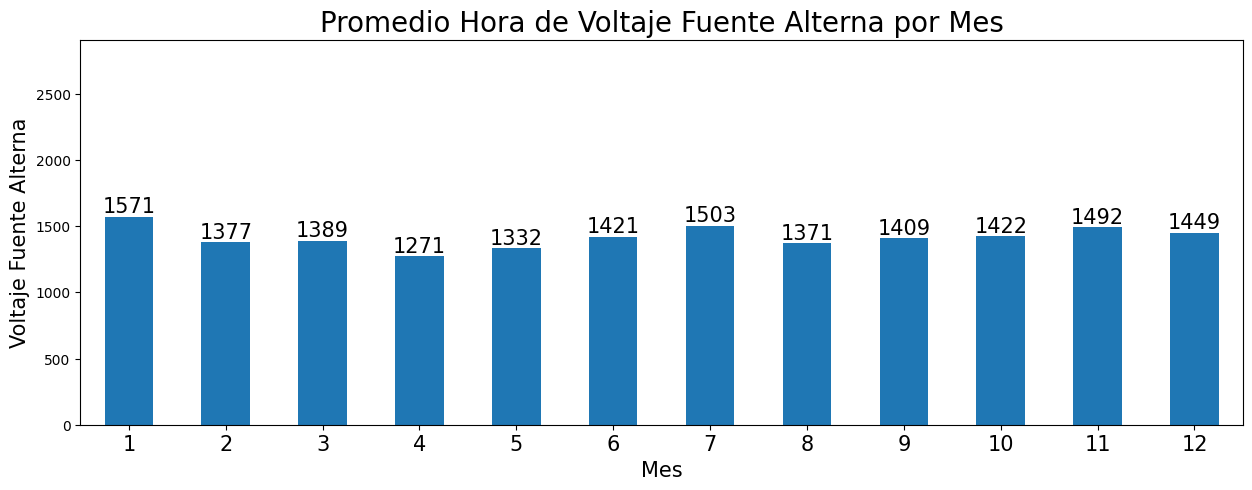

In [ ]:
promedio_mensual = clientes.groupby('Mes')['Voltaje_FA'].mean().reset_index().astype(int)

ax = promedio_mensual.plot.bar(x='Mes', y='Voltaje_FA', rot=0, legend=False, figsize=(15, 5))
plt.ylabel('Voltaje Fuente Alterna', fontsize=15)
plt.xlabel('Mes', fontsize=15)
ax.set_xticklabels(promedio_mensual['Mes'], fontsize=15)
plt.title('Promedio Hora de Voltaje Fuente Alterna por Mes', fontsize=20)
for container in ax.containers:
    ax.bar_label(container, fontsize=15)
ax.set_ylim(0, max(promedio_mensual['Voltaje_FA']) + promedio_mensual['Voltaje_FA'].quantile(0.1))
plt.show()

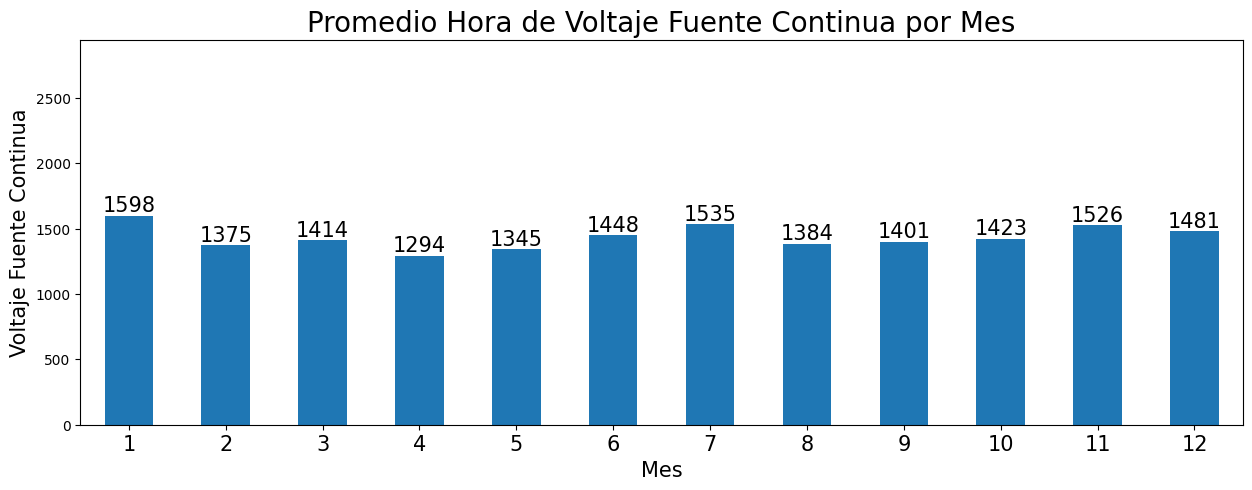

In [ ]:
promedio_mensual = clientes.groupby('Mes')['Voltaje_FC'].mean().reset_index().astype(int)

ax = promedio_mensual.plot.bar(x='Mes', y='Voltaje_FC', rot=0, legend=False, figsize=(15, 5))
plt.ylabel('Voltaje Fuente Continua', fontsize=15)
plt.xlabel('Mes', fontsize=15)
ax.set_xticklabels(promedio_mensual['Mes'], fontsize=15)
plt.title('Promedio Hora de Voltaje Fuente Continua por Mes', fontsize=20)
for container in ax.containers:
    ax.bar_label(container, fontsize=15)
ax.set_ylim(0, max(promedio_mensual['Voltaje_FC']) + promedio_mensual['Voltaje_FC'].quantile(0.1))
plt.show()

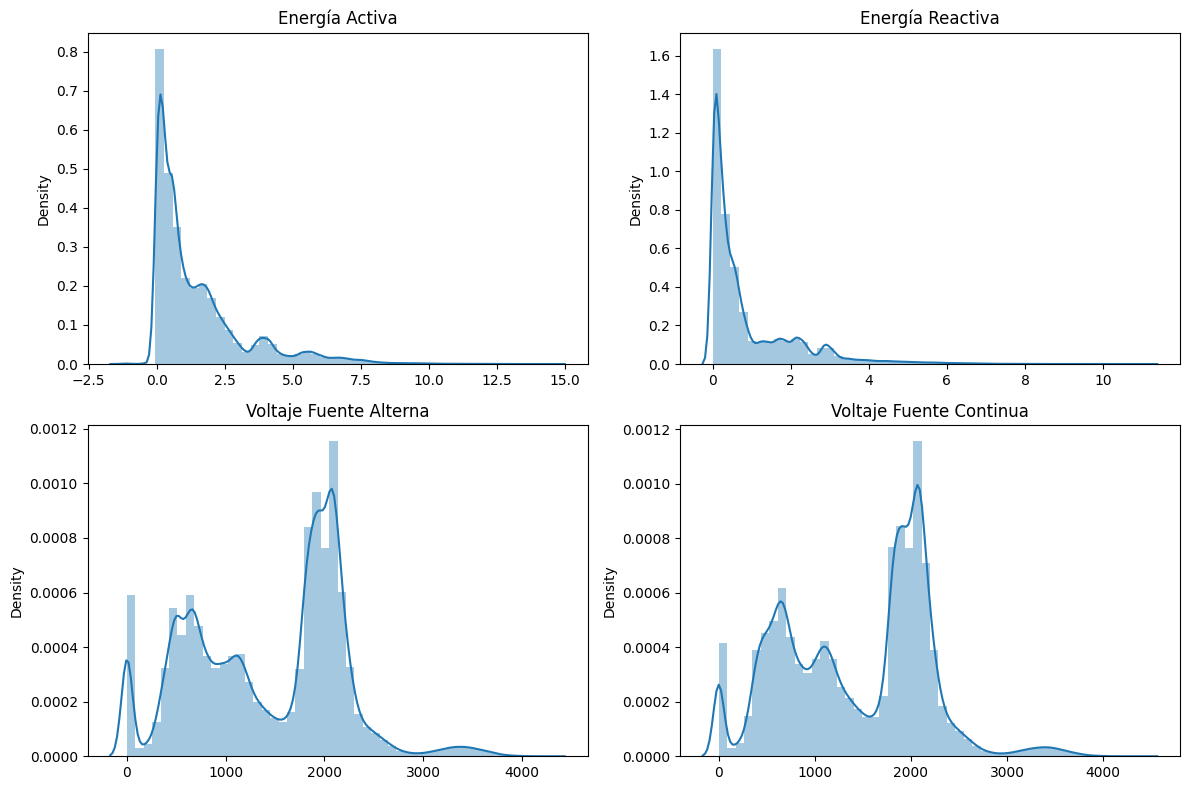

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.distplot(clientes.Active_energy, ax=axs[0, 0])
axs[0, 0].set_title('Energía Activa')
axs[0, 0].set_xlabel('')

sns.distplot(clientes.Reactive_energy, ax=axs[0, 1])
axs[0, 1].set_title('Energía Reactiva')
axs[0, 1].set_xlabel('')

sns.distplot(clientes.Voltaje_FA, ax=axs[1, 0])
axs[1, 0].set_title('Voltaje Fuente Alterna')
axs[1, 0].set_xlabel('')

sns.distplot(clientes.Voltaje_FC, ax=axs[1, 1])
axs[1, 1].set_title('Voltaje Fuente Continua')
axs[1, 1].set_xlabel('')

plt.tight_layout()
plt.show()

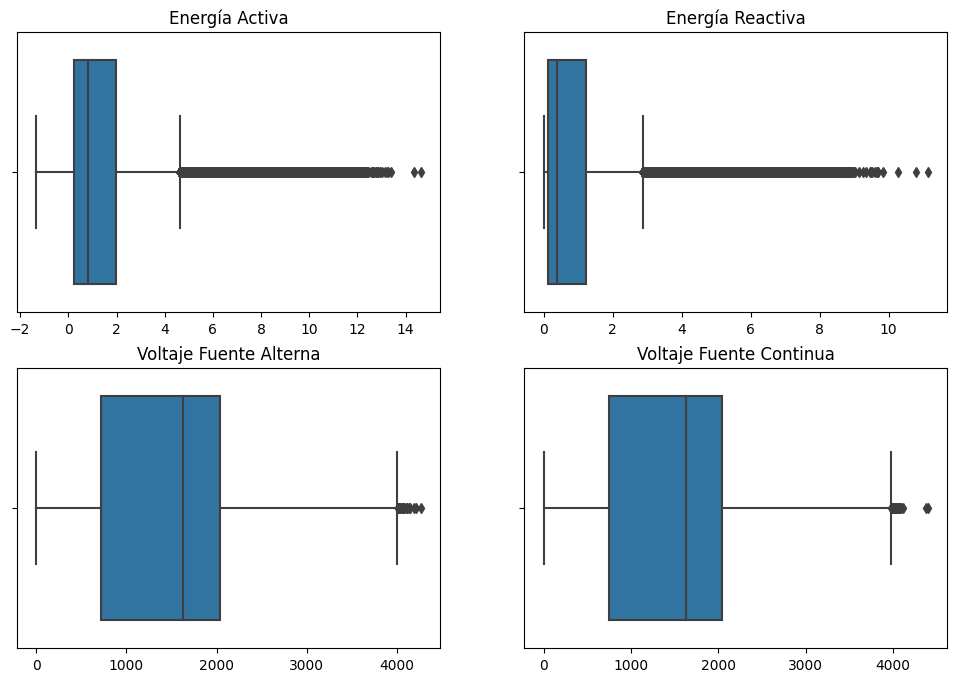

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(ax=axes[0, 0], x=clientes.Active_energy).set(title='Energía Activa', xlabel='')
sns.boxplot(ax=axes[0, 1], x=clientes.Reactive_energy).set(title='Energía Reactiva', xlabel='')
sns.boxplot(ax=axes[1, 0], x=clientes.Voltaje_FA).set(title='Voltaje Fuente Alterna', xlabel='')
sns.boxplot(ax=axes[1, 1], x=clientes.Voltaje_FC).set(title='Voltaje Fuente Continua', xlabel='')
plt.show()

<Axes: >

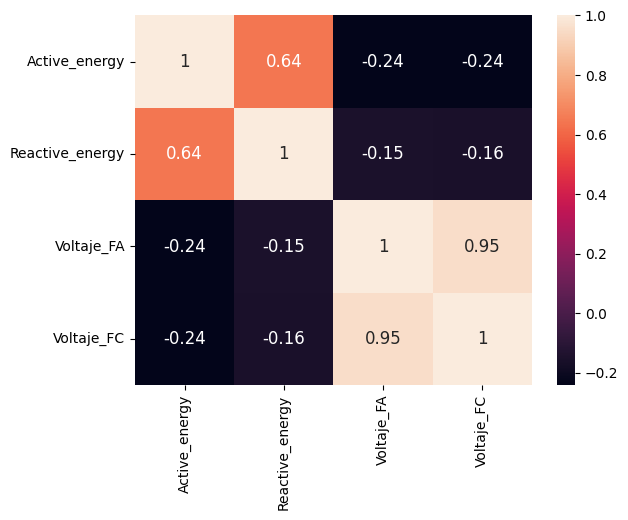

In [ ]:
sns.heatmap(clientes[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']].corr(), annot = True, annot_kws = {'size': 12})

# Características de calidad de los datos

In [28]:
lista = []
for i in rango:
  lista.append([i, clientes[clientes.idCliente == i].Fecha.max()])
  print('Cliente ' + str(i) + ' ->' + ' Fecha max: ' + str(lista[i-1][1]))

Cliente 1 -> Fecha max: 2023-03-31 23:00:00
Cliente 2 -> Fecha max: 2023-03-31 23:00:00
Cliente 3 -> Fecha max: 2023-03-31 23:00:00
Cliente 4 -> Fecha max: 2023-03-31 23:00:00
Cliente 5 -> Fecha max: 2023-03-31 23:00:00
Cliente 6 -> Fecha max: 2023-03-31 23:00:00
Cliente 7 -> Fecha max: 2023-03-31 23:00:00
Cliente 8 -> Fecha max: 2023-03-31 23:00:00
Cliente 9 -> Fecha max: 2023-03-31 23:00:00
Cliente 10 -> Fecha max: 2023-03-31 23:00:00
Cliente 11 -> Fecha max: 2022-08-07 07:00:00
Cliente 12 -> Fecha max: 2022-04-21 14:00:00
Cliente 13 -> Fecha max: 2022-08-07 07:00:00
Cliente 14 -> Fecha max: 2022-08-07 07:00:00
Cliente 15 -> Fecha max: 2022-08-07 07:00:00
Cliente 16 -> Fecha max: 2023-03-24 11:00:00
Cliente 17 -> Fecha max: 2023-03-24 11:00:00
Cliente 18 -> Fecha max: 2023-03-24 11:00:00
Cliente 19 -> Fecha max: 2023-03-24 11:00:00
Cliente 20 -> Fecha max: 2023-03-24 11:00:00
Cliente 21 -> Fecha max: 2022-01-07 20:00:00
Cliente 22 -> Fecha max: 2022-01-07 20:00:00
Cliente 23 -> Fecha

In [ ]:
clientes[clientes.idCliente == 29]

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,idCliente,Mes,Año,Año_Mes
0,2021-01-01 00:00:00,0.343843,0.073540,927.027645,838.563280,29,1,2021,2021-01
1,2021-01-01 01:00:00,0.363504,0.145439,909.764890,1054.578388,29,1,2021,2021-01
2,2021-01-01 02:00:00,0.377710,0.033337,891.648393,778.819502,29,1,2021,2021-01
3,2021-01-01 03:00:00,0.356460,0.062590,769.959871,890.120080,29,1,2021,2021-01
4,2021-01-01 04:00:00,0.191025,0.085954,848.094481,842.700887,29,1,2021,2021-01
...,...,...,...,...,...,...,...,...,...
11410,2022-04-21 10:00:00,0.401788,0.102905,1023.150602,777.084539,29,4,2022,2022-04
11411,2022-04-21 11:00:00,0.357755,0.066763,813.524968,955.829819,29,4,2022,2022-04
11412,2022-04-21 12:00:00,0.344094,0.056855,957.284283,877.893714,29,4,2022,2022-04
11413,2022-04-21 13:00:00,0.375712,0.084561,955.012971,840.835898,29,4,2022,2022-04


## Completitud

In [ ]:
def calcular_porcentaje_de_unknown(dataframe_1):
    porcentaje_faltantes ={'Columnas':[], 'Porcentaje_Unknown':[]}
    for c in list(dataframe_1.columns):
        porcentaje_faltantes['Columnas'].append(c)
        sum_val_unknown=  dataframe_1[dataframe_1[c]== 'nan'][c].count()  + dataframe_1[dataframe_1[c]== np.nan][c].count()
        porcentaje_calculado=sum_val_unknown*100/dataframe_1.shape[0]
        porcentaje_faltantes['Porcentaje_Unknown'].append(porcentaje_calculado)
    return pd.DataFrame(porcentaje_faltantes).sort_values('Porcentaje_Unknown', ascending=False)

In [ ]:
calcular_porcentaje_de_unknown(clientes)

,Columnas,Porcentaje_Unknown
0,Fecha,0.0
1,Active_energy,0.0
2,Reactive_energy,0.0
3,Voltaje_FA,0.0
4,Voltaje_FC,0.0
5,idCliente,0.0
6,Mes,0.0
7,Año,0.0
8,Año_Mes,0.0


In [ ]:
for i in clientes.columns.values:
  nulos = clientes[i].isnull().sum()
  print(f'La columna {i} tiene {nulos} nulos')

La columna Fecha tiene 0 nulos
La columna Active_energy tiene 0 nulos
La columna Reactive_energy tiene 0 nulos
La columna Voltaje_FA tiene 0 nulos
La columna Voltaje_FC tiene 0 nulos
La columna idCliente tiene 0 nulos
La columna Mes tiene 0 nulos
La columna Año tiene 0 nulos
La columna Año_Mes tiene 0 nulos


In [ ]:
for i in clientes.columns.values:
  blancos = pd.isna(clientes[i]).sum()
  print(f'La columna {i} tiene {blancos} na')

La columna Fecha tiene 0 na
La columna Active_energy tiene 0 na
La columna Reactive_energy tiene 0 na
La columna Voltaje_FA tiene 0 na
La columna Voltaje_FC tiene 0 na
La columna idCliente tiene 0 na
La columna Mes tiene 0 na
La columna Año tiene 0 na
La columna Año_Mes tiene 0 na


## Consistencia

In [ ]:
clientes.describe(include="all")

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,idCliente,Mes,Año,Año_Mes
count,463415,463415.000000,463415.000000,463415.000000,463415.000000,463415.000000,463415.000000,463415.000000,463415
unique,19680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
top,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01
freq,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22320
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-03-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.472044,0.873092,1420.199607,1438.527283,13.682887,5.955657,2021.500879,NaN
std,NaN,1.718783,1.158856,766.301479,746.449449,8.407279,3.519360,0.621247,NaN
min,NaN,-1.329018,0.000000,0.031000,0.031000,1.000000,1.000000,2021.000000,NaN
25%,NaN,0.242779,0.112828,719.472565,748.161632,6.000000,3.000000,2021.000000,NaN


In [ ]:
clientes[clientes.Active_energy < 0].shape[0] / clientes.shape[0] * 100

0.10897359817873828

In [ ]:
clientes[clientes.Active_energy < 0].idCliente.value_counts()

18    256
20    215
17     34
Name: idCliente, dtype: int64

In [ ]:
def contar_outliers(col):
  Q1 = clientes[col].quantile(0.25)
  Q3 = clientes[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = clientes[(clientes[col] < lower_bound) | (clientes[col] > upper_bound)]
  cantidad_outliers = len(outliers)
  return cantidad_outliers

for i in clientes.columns[1:5]:
  print(f'{i}: hay {contar_outliers(i)} outliers, que representan el {round(contar_outliers(i) / clientes.shape[0] * 100, 2)}%')

Active_energy: hay 31702 outliers, que representan el 6.84%
Reactive_energy: hay 33392 outliers, que representan el 7.21%
Voltaje_FA: hay 28 outliers, que representan el 0.01%
Voltaje_FC: hay 30 outliers, que representan el 0.01%


# Limpieza de datos

In [ ]:
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
listaClientes = list(clientes.idCliente.unique())
distance = []
for i in listaClientes:
    df2 = df[df.idCliente==i][columnas].copy()
    neigh = NearestNeighbors(n_neighbors = 5)
    nbrs = neigh.fit(df2)
    distancias, indices = nbrs.kneighbors(df2)
    distancias = np.sort(distancias.flatten())
    j = np.arange(len(distancias))
    knee = KneeLocator(j, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    distance.append(distancias[knee.knee])

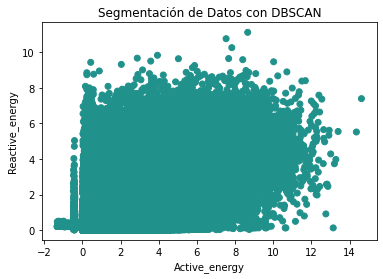

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
columnas = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']
df = clientes[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC','idCliente']]

# Escalamos los datos para asegurar que todas las variables tengan la misma escala
j=0
# Aplicamos el algoritmo DBSCAN
for i in listaClientes:
    if i ==1:
        df2 = df[df.idCliente==i][columnas].copy()
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df2)
        dbscan = DBSCAN(eps=distance[j], min_samples=5,n_jobs=-1)
        df2['cluster'] = dbscan.fit_predict(df_scaled)
        df3 = df2.copy()
    else:
        df2 = df[df.idCliente==i][columnas].copy()
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df2)
        dbscan = DBSCAN(eps=distance[j], min_samples=5,n_jobs=-1)
        df2['cluster'] = dbscan.fit_predict(df_scaled)
        df3 = pd.concat([df3,df2])
    j+=1

# Visualizamos los resultados
plt.scatter(df3['Active_energy'], df3['Reactive_energy'], c=df3['cluster'], cmap='viridis')
plt.title('Segmentación de Datos con DBSCAN')
plt.xlabel('Active_energy')
plt.ylabel('Reaactive_energy')
plt.show()

In [ ]:
plt.scatter(df3['Active_energy'], df3['Reactive_energy'], c=df3['cluster'], cmap='viridis')
plt.title('Segmentación de Datos con DBSCAN')
plt.xlabel('Active_energy')
plt.ylabel('Reactive_energy')
plt.show()

In [ ]:
df3.cluster.value_counts()

cluster
 0    461614
 1      1800
-1         1
Name: count, dtype: int64

Varianza explicada por cada componente principal: [0.55645486 0.34393882 0.08832495]


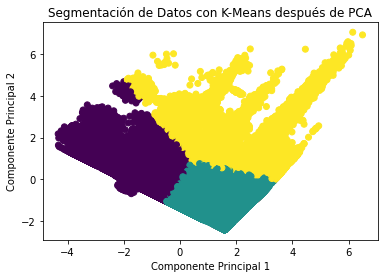

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = clientes[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicamos PCA para reducción de dimensionalidad
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Visualizamos la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

# Aplicamos el algoritmo K-Means en las componentes principales
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_jobs=1)
df['cluster'] = kmeans.fit_predict(df_pca)

# Visualizamos los resultados
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Segmentación de Datos con K-Means después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

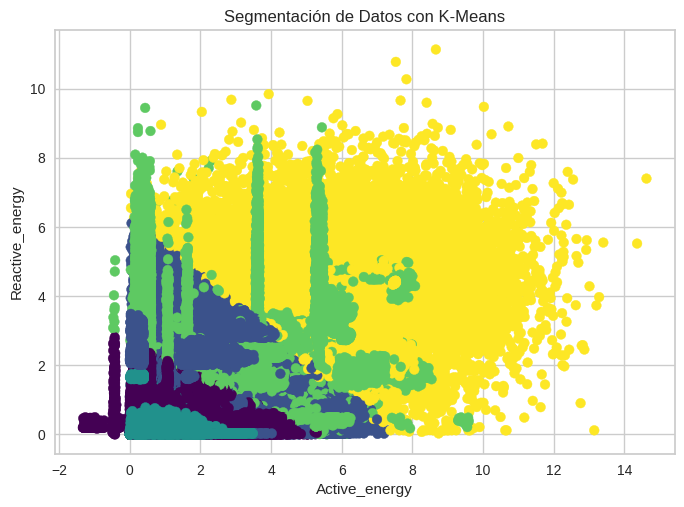

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = clientes[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Número de clústeres
num_clusters = 5

# Aplicamos el algoritmo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualizamos los resultados
plt.scatter(df['Active_energy'], df['Reactive_energy'], c=df['cluster'], cmap='viridis')
plt.title('Segmentación de Datos con K-Means')
plt.xlabel('Active_energy')
plt.ylabel('Reactive_energy')
plt.show()

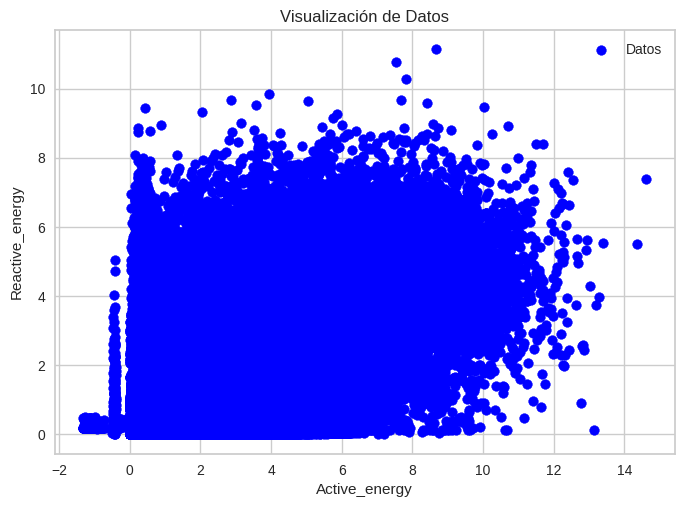

KeyboardInterrupt: ignored

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer

df = clientes[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']]

# Visualizamos los datos de las variables energía activa y reactiva
plt.scatter(df['Active_energy'], df['Reactive_energy'], c='blue', label='Datos')
plt.title('Visualización de Datos')
plt.xlabel('Active_energy')
plt.ylabel('Reactive_energy')
plt.legend()
plt.show()

# Determinamos el número óptimo de clusters el Coeficiente de Silhoutte
def determine_optimal_clusters_kmeans(data, max_clusters=10):
    sil_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        sil_score = silhouette_score(data, kmeans.labels_)
        sil_scores.append(sil_score)

    # Visualizar la Coeficiente de Silhoutte
    plt.plot(range(2, max_clusters + 1), sil_scores, marker='o')
    plt.title('Silueta Media para K-Means')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Silueta Media')
    plt.show()

# Determinamos el número óptimo de clusters para K-Means
determine_optimal_clusters_kmeans(df)

# Implementamos K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

# Implementamos K-Medoids con el número óptimo de clusters
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(df)

# Implementamos DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(df)

# Implementamos algoritmo jerárquico aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df)

# Visualizamos los resultados de los clusters
plt.scatter(df['Active_energy'], df['Reactive_energy'], c=kmeans_labels, cmap='viridis', label='K-Means')
plt.title('Clusters K-Means')
plt.xlabel('Active_energy')
plt.ylabel('Reactive_energy')
plt.legend()
plt.show()

plt.scatter(df['Active_energy'], df['Reactive_energy'], c=kmedoids_labels, cmap='viridis', label='K-Medoids')
plt.title('Clusters K-Medoids')
plt.xlabel('Active_energy')
plt.ylabel('Reactive_energy')
plt.legend()
plt.show()

plt.scatter(df['Active_energy'], df['Reactive_energy'], c=dbscan_labels, cmap='viridis', label='DBSCAN')
plt.title('Clusters DBSCAN')
plt.xlabel('Active_energy')
plt.ylabel('Reactive_energy')
plt.legend()
plt.show()

plt.scatter(df['Active_energy'], df['Reactive_energy'], c=agg_labels, cmap='viridis', label='Agglomerative')
plt.title('Clusters Jerárquico Aglomerativo')
plt.xlabel('Active_energy')
plt.ylabel('Reactive_energy')
plt.legend()
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

df = clientes[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']]

# Escalamos los datos para asegurar que todas las variables tengan la misma escala
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Encontramos el número óptimo de clusters utilizando el coeficiente de silhouette
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualizamos los resultados del coeficiente de silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silhouette para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

# Eligimos el número óptimo de clusters a partir de la gráfica
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Número óptimo de clusters según el coeficiente de silhouette: {optimal_num_clusters}")

# Implementamos el Autoencoder con K-Means usando el número óptimo de clusters
input_dim = df.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=0)

# Entrenamos el Autoencoder solo en el conjunto de entrenamiento
autoencoder.fit(X_train, X_train, epochs=10, batch_size=16, shuffle=True, validation_split=0.2)

# Obtenemos la representación reducida de los datos (puntos en el espacio latente)
encoder = Model(input_layer, encoded)
df_encoded = encoder.predict(df_scaled)

# Aplicamos K-Means en la representación reducida con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(df_encoded)

# Visualizamos los resultados
plt.scatter(df_encoded[:, 0], df_encoded[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Segmentación de Datos con Autoencoder y K-Means')
plt.xlabel('Dimensión 1 (Autoencoder)')
plt.ylabel('Dimensión 2 (Autoencoder)')
plt.show()

KeyboardInterrupt: 

In [16]:
#!pip install pyod

In [42]:
df = clientes[['idCliente','Año_Mes','Active_energy', 'Reactive_energy']]
df['FactorPotencia'] = df['Active_energy'] / (df['Active_energy']**2 + df['Reactive_energy']**2)**(1/2)
df = df.fillna(0)
df

,idCliente,Año_Mes,Active_energy,Reactive_energy,FactorPotencia
0,1,2021-01,0.357841,0.282788,0.784582
1,1,2021-01,0.372264,0.431377,0.653329
2,1,2021-01,1.044687,0.338626,0.951274
3,1,2021-01,0.566425,0.495791,0.752465
4,1,2021-01,1.080556,0.472018,0.916383
...,...,...,...,...,...
11410,30,2022-04,0.960105,0.473234,0.896961
11411,30,2022-04,0.624300,0.699936,0.665634
11412,30,2022-04,0.985633,0.123560,0.992234
11413,30,2022-04,0.710436,0.399262,0.871763


In [52]:
from pyod.models.knn import KNN
df = clientes[['idCliente','Mes','Active_energy', 'Reactive_energy']]
df['FactorPotencia'] = df['Active_energy'] / (df['Active_energy']**2 + df['Reactive_energy']**2)**(1/2)
df = df.fillna(0)
df = df[['idCliente','Mes','FactorPotencia']]
clf = KNN()
clf.fit(df)
y_pred = clf.predict(df)
df[y_pred == 1]

,idCliente,Mes,FactorPotencia
1,1,1,0.653329
144,1,1,0.535216
146,1,1,0.244768
147,1,1,0.595504
148,1,1,0.683662
...,...,...,...
11360,30,4,0.519553
11391,30,4,0.400128
11400,30,4,0.810023
11403,30,4,0.580840


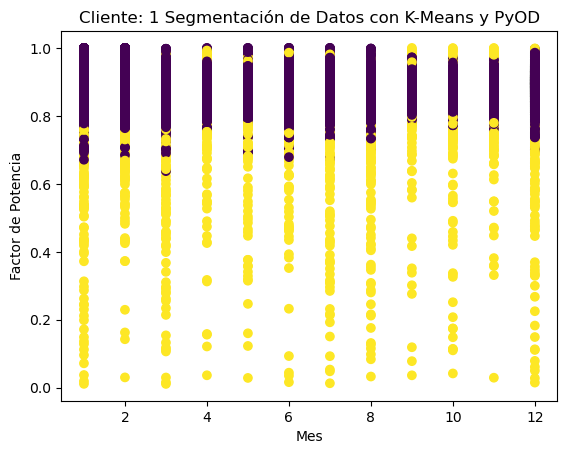

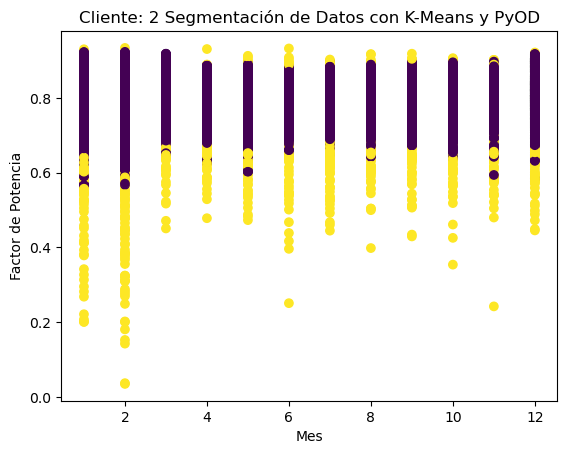

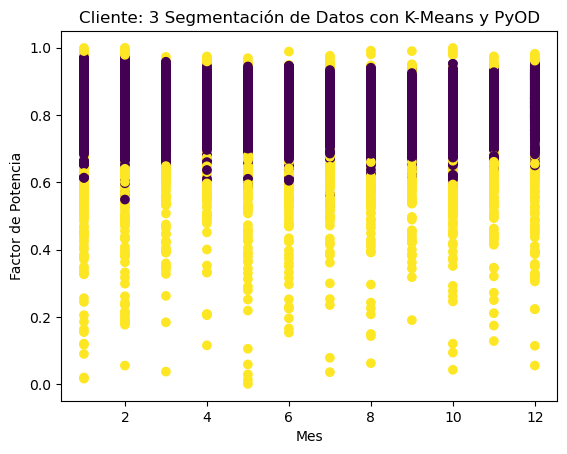

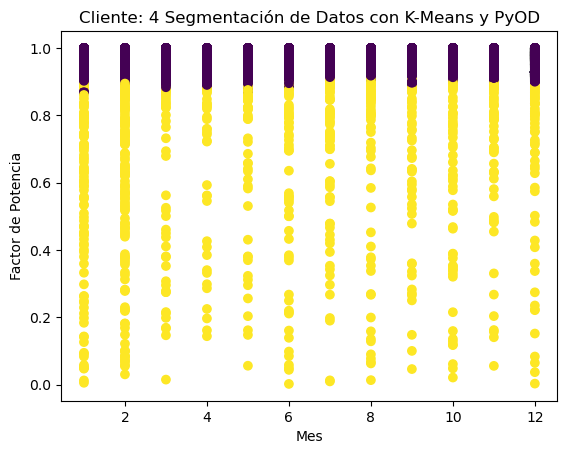

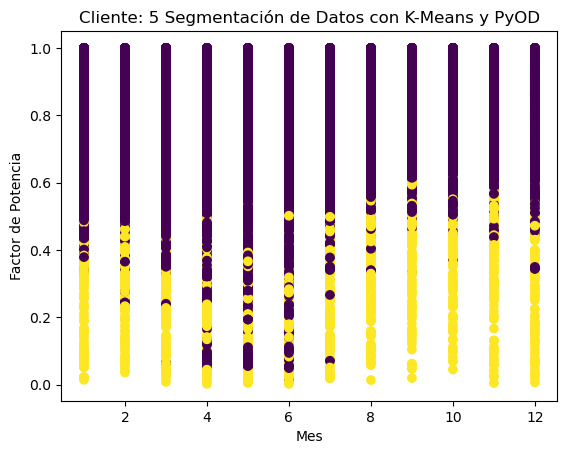

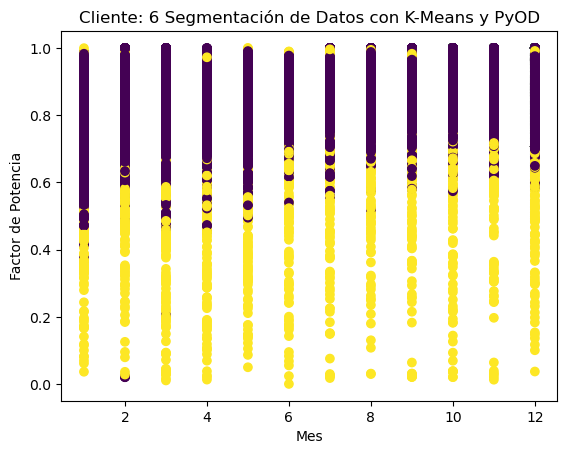

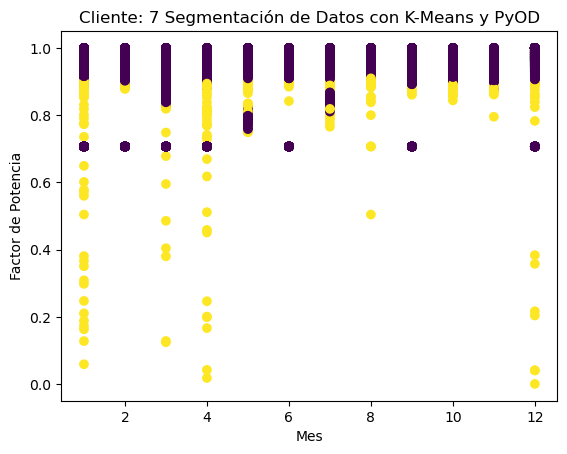

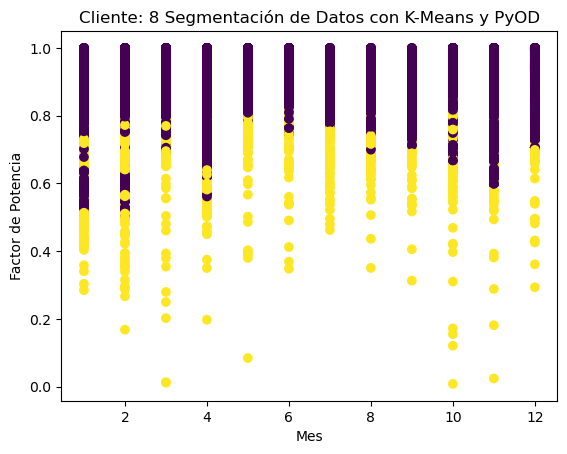

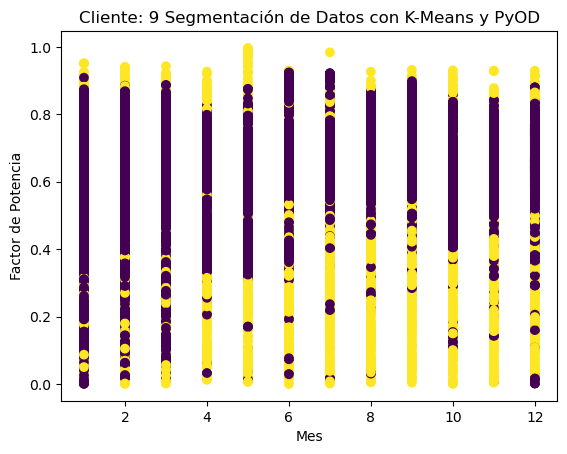

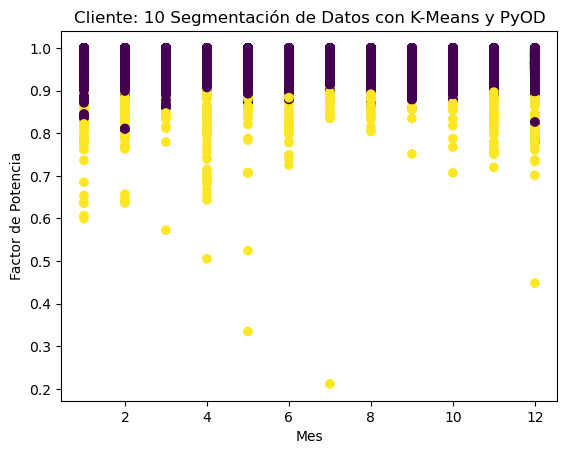

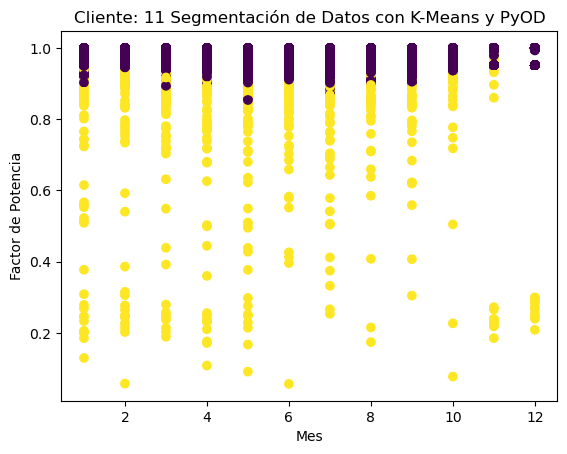

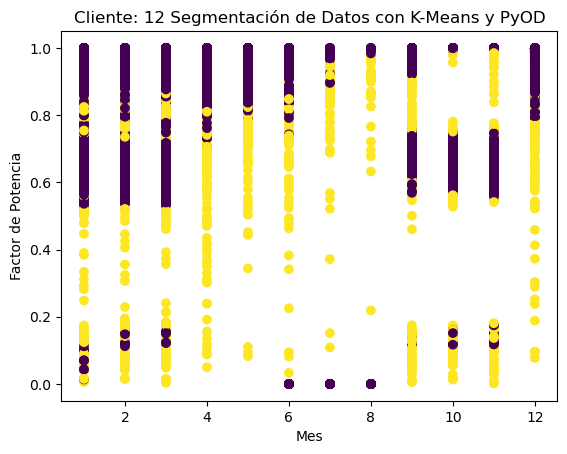

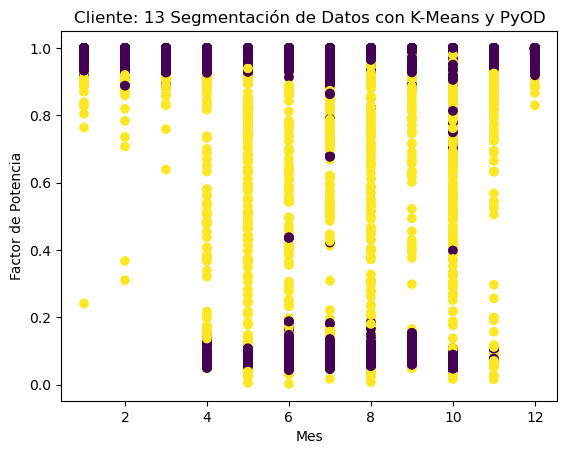

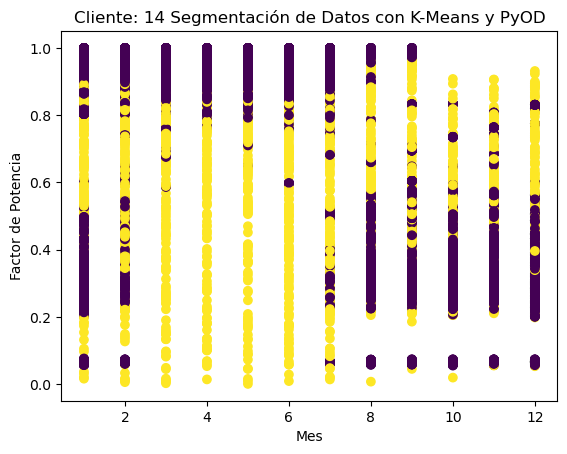

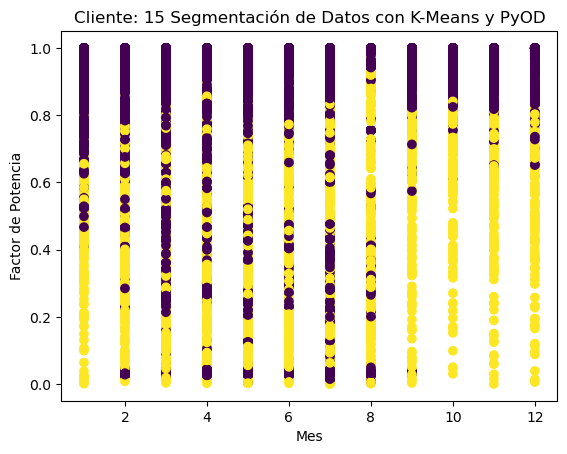

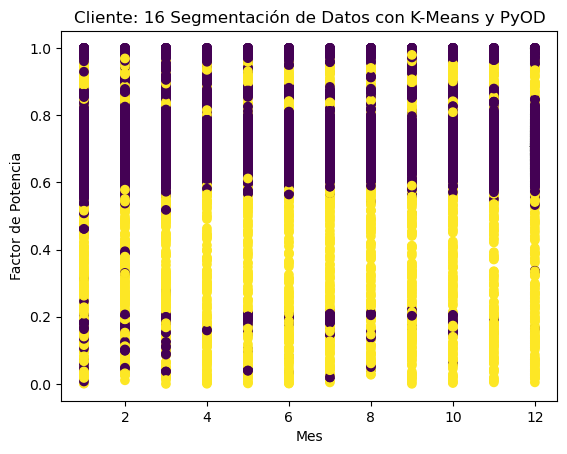

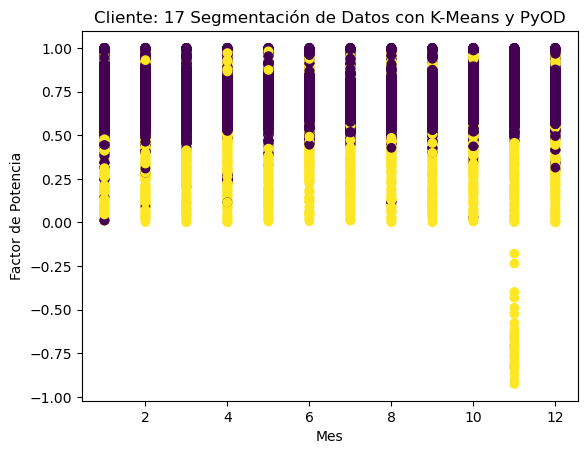

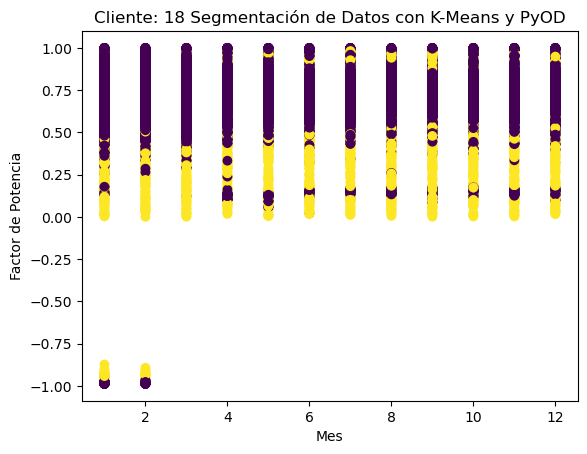

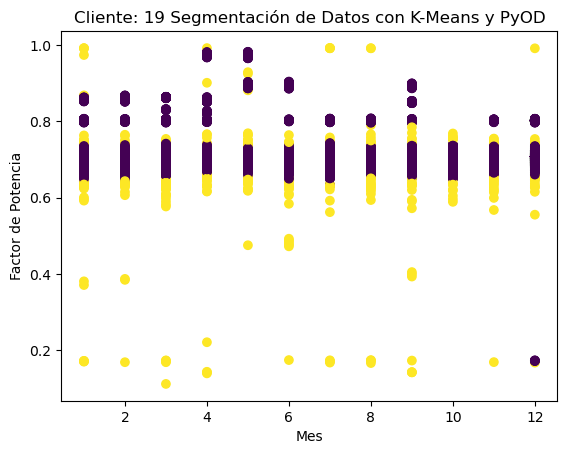

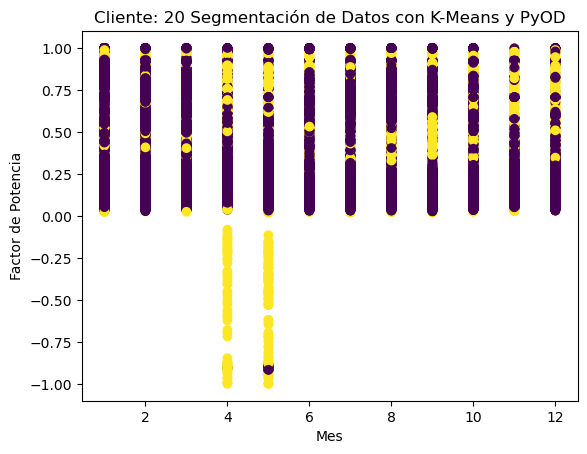

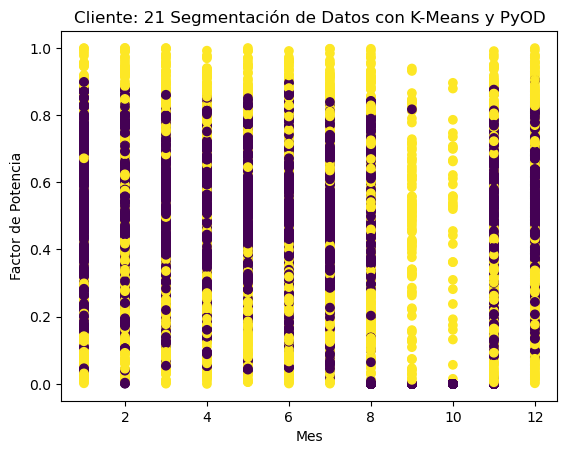

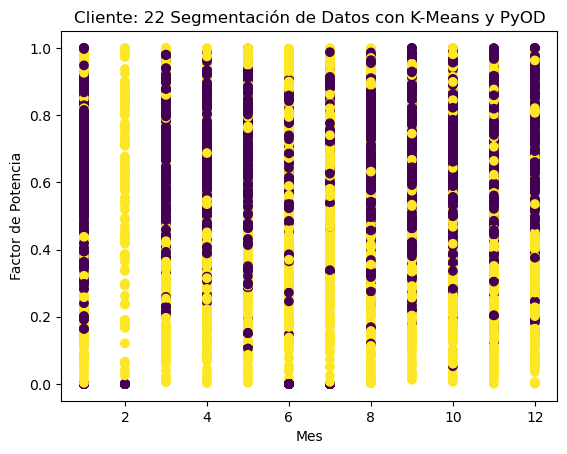

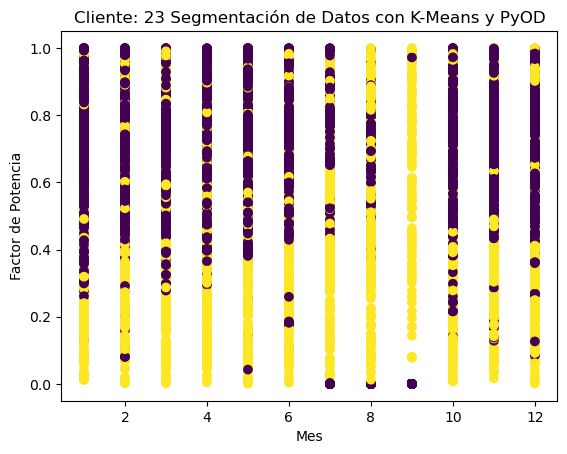

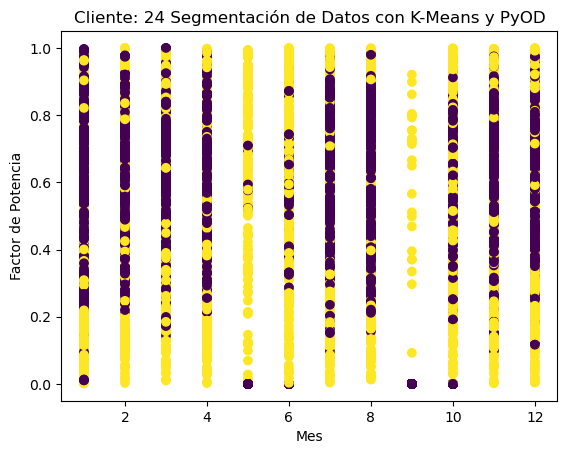

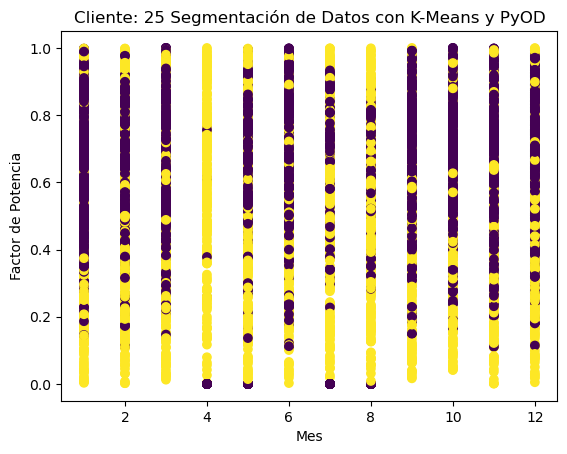

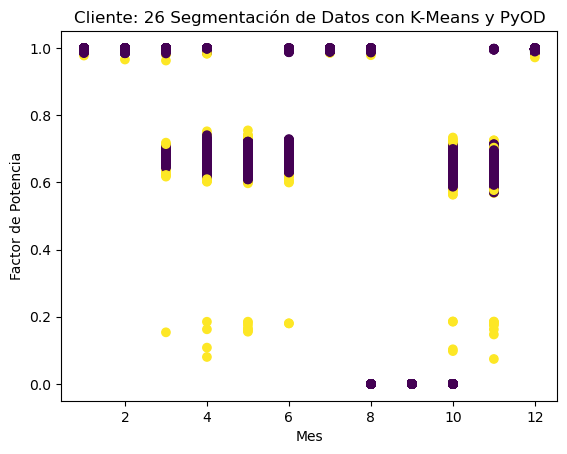

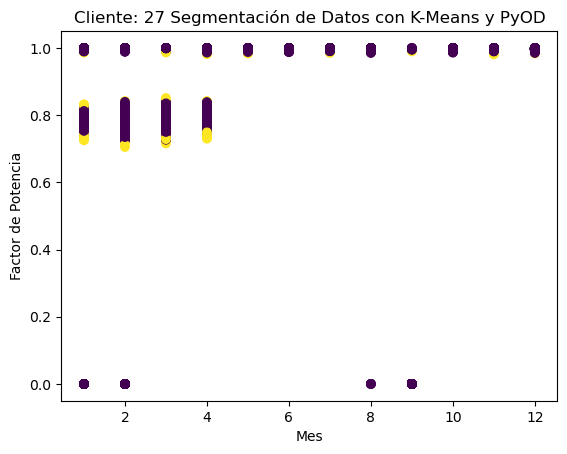

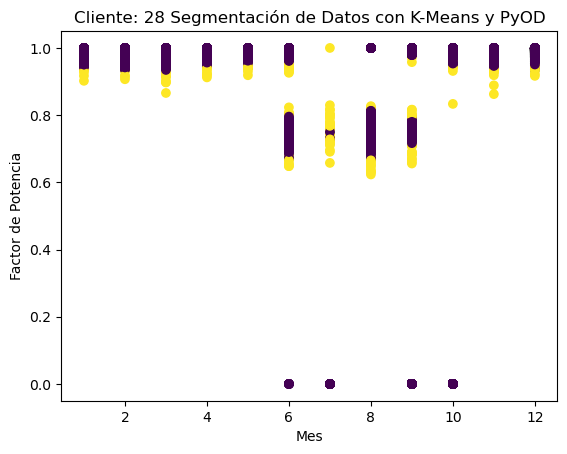

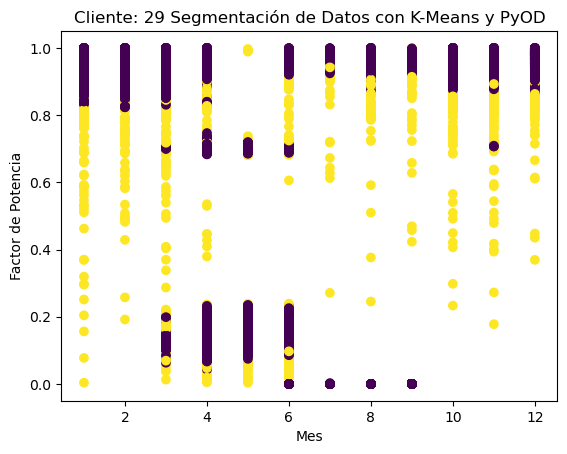

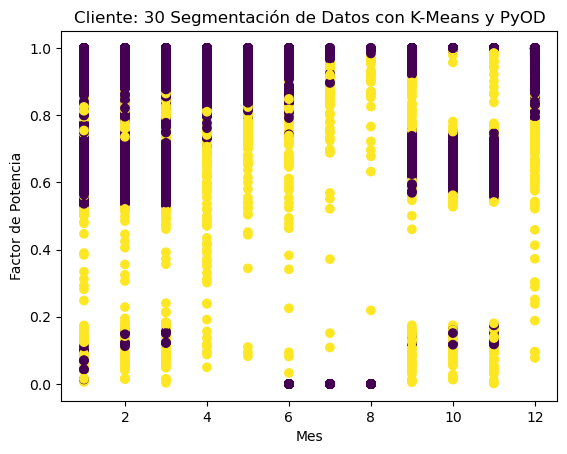

In [55]:
df['cluster'] = y_pred

# Visualizamos los resultados
for i in range(1,31):
    tempdf = df[df.idCliente == i]
    plt.scatter(tempdf['Mes'], tempdf['FactorPotencia'], c=tempdf['cluster'], cmap='viridis')
    plt.title("Cliente: "+ str(i) + ' Segmentación de Datos con K-Means y PyOD')
    plt.xlabel('Mes')
    plt.ylabel('Factor de Potencia')
    plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Supongamos que tienes una matriz de datos X donde cada fila representa un cliente y cada columna es una característica
# Por ejemplo:
# X = ... 

# Crear un modelo Isolation Forest para cada cliente
outliers = []

for i in range(X.shape[0]):  # Para cada cliente
    # Seleccionar solo los datos del cliente actual
    cliente_data = X[i, :].reshape(-1, 1)  # Se asume que los datos de cada cliente están en una fila de la matriz X
    
    # Entrenar el modelo Isolation Forest
    model = IsolationForest(contamination='auto', random_state=42)
    model.fit(cliente_data)
    
    # Predecir anomalías (valores atípicos)
    outliers_cliente = model.predict(cliente_data)
    
    # Guardar las predicciones de anomalías para el cliente actual
    outliers.append(outliers_cliente)

# Convertir la lista de predicciones en un array NumPy
outliers = np.array(outliers)

# Ahora outliers[i, j] indica si el cliente i es anómalo para la característica j

# Imprimir los resultados
for i in range(outliers.shape[0]):
    print(f"Cliente {i+1}: {np.sum(outliers[i] == -1)} datos anómalos")


In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM

# Supongamos que tienes una matriz de datos X donde cada fila representa un cliente y cada columna es una característica
# Por ejemplo:
# X = ... 

# Crear un modelo One-Class SVM para cada cliente
outliers = []

for i in range(X.shape[0]):  # Para cada cliente
    # Seleccionar solo los datos del cliente actual
    cliente_data = X[i, :].reshape(-1, 1)  # Se asume que los datos de cada cliente están en una fila de la matriz X
    
    # Entrenar el modelo One-Class SVM
    model = OneClassSVM(nu=0.1)  # Utiliza un valor de nu adecuado
    model.fit(cliente_data)
    
    # Predecir anomalías (valores atípicos)
    outliers_cliente = model.predict(cliente_data)
    
    # Guardar las predicciones de anomalías para el cliente actual
    outliers.append(outliers_cliente)

# Convertir la lista de predicciones en un array NumPy
outliers = np.array(outliers)

# Ahora outliers[i, j] indica si el cliente i es anómalo para la característica j

# Imprimir los resultados
for i in range(outliers.shape[0]):
    print(f"Cliente {i+1}: {np.sum(outliers[i] == -1)} datos anómalos")
